In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the excel file with all the shhets ofdata
import pandas as pd
path = ('c:\\Users\\manas\\OneDrive\\Desktop\\GITHUB\\KPMG-Internship\\KPMG-Internship\\Data\\KPMG_VI_New_raw_data_update_final.xlsx')
xl = pd.ExcelFile(path)
print(xl.sheet_names)

['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


## Transactions table Analysis

In [5]:
Transactions = pd.read_excel(xl, 'Transactions')
#Transactions 

In [6]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [7]:
# no. of unique customers in the table
len(Transactions.customer_id.unique())

3494

In [8]:
# checking missing values for each column int the table
empty_nulls=[' ']
Transactions = Transactions.replace(empty_nulls,np.NAN)
Transactions.isnull().sum()
## brand,Product_line,product_class,product_size,standard_cost,product_first_sold_date has almost 1% of the data missing which is negligble and all the
# columns have missing values for same records
## online_order has 1.79% missing values, as it is categorical varaible we can make it as other new level "unknown"

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [9]:
# checking if there are any duplicate transcations in the data
Transactions.shape,len(Transactions['transaction_id'].unique())
#There are no duplicate transactions

((20000, 13), 20000)

In [10]:
Transactions.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [11]:
## checking date format

date_range = str(Transactions['transaction_date'].dt.date.min()),str(Transactions['transaction_date'].dt.date.max())
date_range
#('2017-01-01', '2017-12-30')

('2017-01-01', '2017-12-30')

In [12]:
Transactions['product_first_sold_date'].unique()
##This column has random values rather than the date sold

array([41245., 41701., 36361., 36145., 42226., 39031., 34165., 39915.,
       33455., 38216., 40784., 42172., 34527., 34586., 38193., 37873.,
       38206., 33888., 37337., 36334., 42145., 42404., 34079., 41047.,
       42560., 42710., 41922., 37539., 42688., 38991., 38647., 37874.,
       34996., 33549., 38693., 37668., 41533., 41009., 40553., 39427.,
       38482., 35470., 41434., 36367., 38750., 41848., 34244., 42696.,
       38258., 41167., 40672., 35707., 42295., 33552., 35667., 33879.,
       40670., 37626., 38339., 40303., 34143., 35160., 36668., 36498.,
       34071., 40649., 37823., 36146., 42105., 34115., 35052., 33364.,
       42218., 41345., 33429., 38859.,    nan, 36833., 37499., 41064.,
       33259., 35560., 37838., 37698., 35378., 38573., 38002., 39526.,
       39880., 40487., 40336., 40618., 34170., 40410., 42458., 39298.,
       35455., 37220., 37659., 40779., 34556.])

## NewcustomerList Table Analysis

In [14]:
NewCustomerList = pd.read_excel(xl,'NewCustomerList')

In [15]:
NewCustomerList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

### NewCustomerList
##### There is no customerid to uniquely identify each customer 
##### There are five columns in this table without name of the column,However these columns are present in the CustomerDemogrphic and CustomerAddress table so these may not be required for present  scope.
#####

## CustomerDemographics Table Analysis

In [16]:
CustomerDemographic = pd.read_excel(xl,'CustomerDemographic')

In [17]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [18]:
# see if the customers in the Transactions table has their info in CustomerDemographic data
#Transactions.customer_id.unique() in CustomerDemographic.customer_id.unique()

Transactions['match'] = Transactions.customer_id.isin(CustomerDemographic.customer_id).astype(int)


In [19]:
Transactions[Transactions['match']==0]
# 1 customer with id 5034 doesn't have informations in cutomerDemographics table

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,match
8707,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,42218.0,0
16700,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,35667.0,0
17468,17469,0,5034,2017-01-03,0.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.400024,33879.0,0


In [20]:
CustomerDemographic.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [21]:
# get the min and max dates in DOB column
CustomerDemographic['DOB'].agg(['min', 'max'])

## the DOB has values from 1843 which is more than 100 years a person more than hundred years cannot be alive

min   1843-12-21
max   2002-03-11
Name: DOB, dtype: datetime64[ns]

In [22]:
# check how many records have DOB more than 100 years
CustomerDemographic[CustomerDemographic['DOB'] < '1923-1-1']

# only one customer 34 has DOB as  1843 which can be treated as outlier

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0


In [23]:
# check for all the null values count in each column
CustomerDemographic_empty_nulls=[' ']
CustomerDemographic = CustomerDemographic.replace(CustomerDemographic_empty_nulls,np.NAN)
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [24]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [25]:
CustomerDemographic.gender.unique()
# This column has Data accuracy issue the Female level is represented in different levels like 'F','Femal','Female' same with male level
# There is another level 'U' which can be considered as unknown level

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

count    4000.000000
mean       48.890000
std        28.715005
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

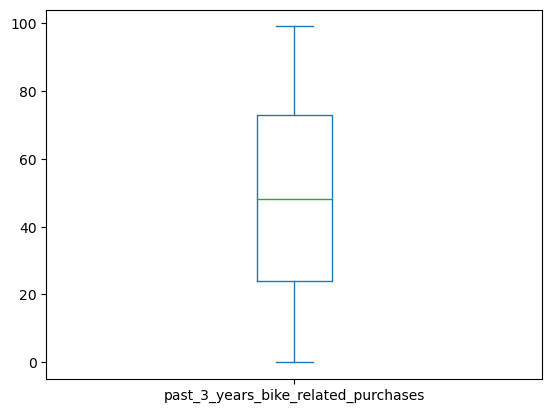

In [26]:
CustomerDemographic.past_3_years_bike_related_purchases.plot(kind='box');
#no outliers
CustomerDemographic.past_3_years_bike_related_purchases.describe()

In [27]:
len(CustomerDemographic.job_title.unique())

196

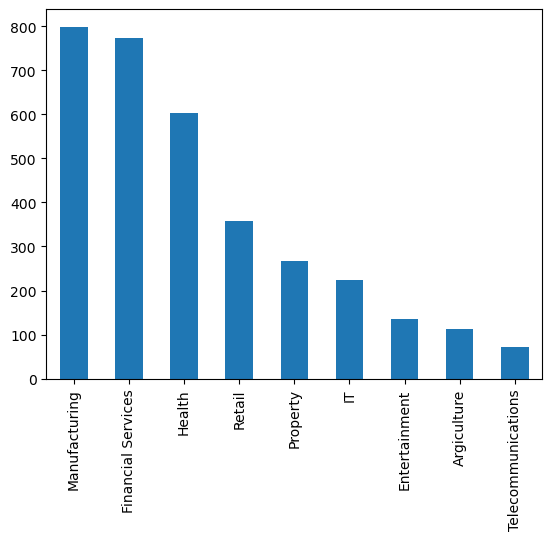

In [28]:
CustomerDemographic.job_industry_category.value_counts().plot(kind = 'bar');

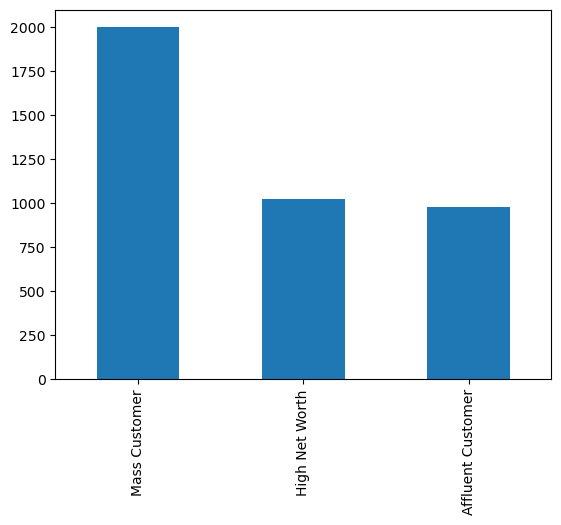

In [29]:
CustomerDemographic.wealth_segment.value_counts().plot(kind = 'bar');

In [30]:
CustomerDemographic.groupby('deceased_indicator')['deceased_indicator'].count()
## Almost every customer has deceased_indicator 'N'

deceased_indicator
N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [31]:
CustomerDemographic.default.unique()

array(['"\'', "<script>alert('hi')</script>",
       datetime.datetime(2018, 2, 1, 0, 0),
       '() { _; } >_[$($())] { touch /tmp/blns.shellshock2.fail; }',
       'NIL', 'ðµ ð ð ð', 'â°â´âµâââ', '(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»)', '0/0',
       'ð©ð½', 'ÅâÂ´Â®â\xa0Â¥Â¨ËÃ¸Ïââ', 'nil', -100, 'â°â´âµ', 'ð',
       1000000000000000049861653971908893017010268485438462151574892930611988399099305815384459015356416,
       'ï¾ï½¥â¿ã¾â²(ï½¡ââ¿âï½¡)â±â¿ï½¥ï¾', 'Î©âÃ§ââ«ËÂµâ¤â¥Ã·',
       'ÅâÂ´â°ËÃÂ¨ËÃâââ', 'ï¼ï¼ï¼',
       '../../../../../../../../../../../etc/hosts',
       '×Ö¸×Ö°×ªÖ¸×testØ§ÙØµÙØ\xadØ§Øª Ø§ÙØªÙØ\xadÙÙ', '<>?:"{}|_+',
       '\'\'\'\'"', ",./;'[]\\-=",
       '() { 0; }; touch /tmp/blns.shellshock1.fail;',
       'ì¬íê³¼íì ì´íì°êµ¬ì', 'testâ\xa0testâ«',
       '0ï¸â£ 1ï¸â£ 2ï¸â£ 3ï¸â£ 4ï¸â£ 5ï¸â£ 6ï¸â£ 7ï¸â£ 8ï¸â£ 9ï¸â£ ð',
       nan, '!@#$%^&*()', "'",
       'Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌÍWÌ·Ì¼Ì\xadaÌºÌªÍiÌ¨ÍÍÌ\xadÍÌ¯ÌtÌ¶Ì¼Ì®sÌÌÍÍ Ì\xa0Ì«Ì\xa0BÌ»ÍÍÍÍÌ³eÌµhÌµÌ¬ÍÌ«Í

<AxesSubplot:xlabel='owns_car'>

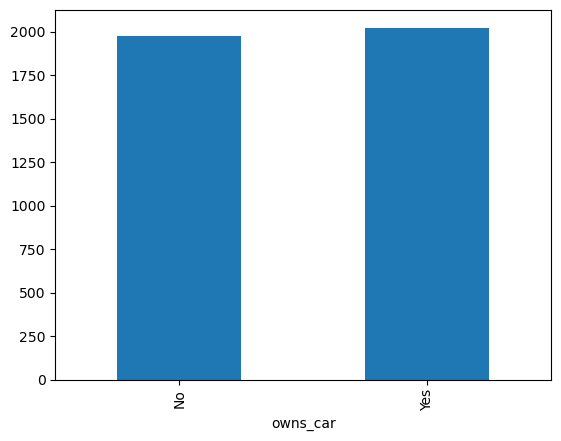

In [32]:
CustomerDemographic.groupby('owns_car')['owns_car'].count().plot(kind = 'bar')

In [33]:
CustomerAddress =pd.read_excel(xl,'CustomerAddress')

In [34]:
CustomerAddress.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [38]:
len(CustomerAddress.customer_id.unique())

3999

In [40]:
len(CustomerAddress.customer_id.unique())

3999

In [44]:
CustomerDemographic['customerid_match'] = CustomerDemographic.customer_id.isin(CustomerAddress.customer_id).astype(int)

In [43]:
CustomerDemographic[CustomerDemographic['customerid_match']== 0 ]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,customerid_match
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0,0
21,22,Deeanne,Durtnell,Female,79,1962-12-10,NaN,IT,Mass Customer,N,ï¼ï¼ï¼,No,11.0,0
22,23,Olav,Polak,Male,43,1995-02-10,NaN,NaN,High Net Worth,N,2018-02-01 00:00:00,Yes,1.0,0


In [35]:
import os
os.getcwd()

'c:\\Users\\manas\\OneDrive\\Desktop\\GITHUB\\KPMG-Internship\\KPMG-Internship\\Data_Quality_Analysis'